# (k) Nearest Neighbour

Nearest Neighbour can be said as the most naive machine learning. Like why even bother with training, when all you have to do is comparing between new data with current data. However, we'll see some pro-cons about using NN in the following notebooks.

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Meet the Dataset

Download here: https://www.dropbox.com/s/irppsewmuc7wbap/swiss4.csv?dl=0

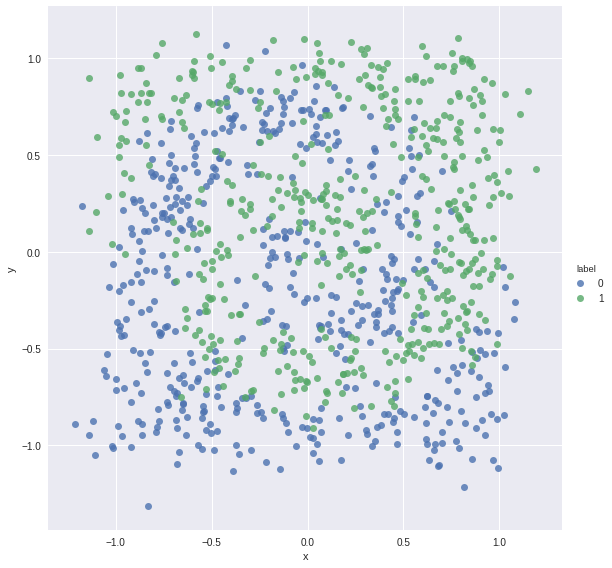

In [2]:
df = pd.read_csv('swiss4.csv', sep='\s+')
sns.lmplot('x', 'y', data=df, fit_reg=False, hue='label', size=8)

### Voronoi Diagram

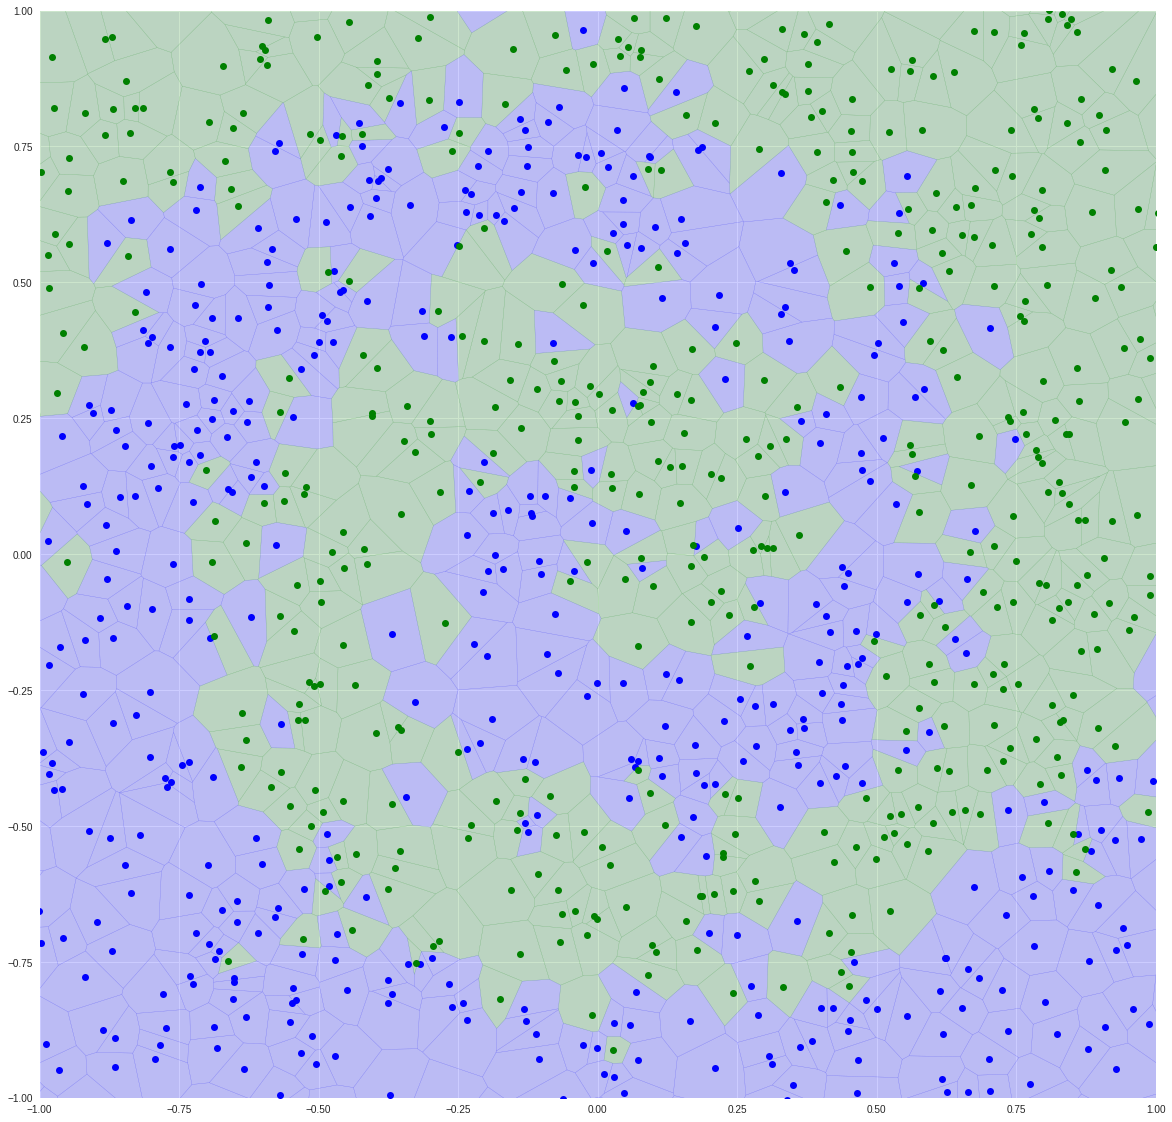

In [3]:
plt.figure(figsize=(20, 20))
plt.plot(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], 'bo')
plt.plot(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], 'go')

# df[['x', 'y']].as_matrix()
from scipy.spatial import Voronoi
points = df[['x', 'y']].as_matrix()
vor = Voronoi(points)

for i in xrange(len(vor.point_region)):
        index = vor.point_region[i]
        if not -1 in vor.regions[index]:
            polygon = [vor.vertices[j] for j in vor.regions[index]]
            if df.iloc[i]['label'] == 0:
                plt.fill(*zip(*polygon), color='blue', alpha=0.2)
            else:
                plt.fill(*zip(*polygon), color='green', alpha=0.2)
plt.xlim((-1, 1))
plt.ylim((-1, 1));

Test different value of k to observe the effect on the decision boundary

In [4]:
import collections

def euclidean(a, b):
    temp = 0
    for i in xrange(len(a)):
        temp += math.pow(a[i] - b[i], 2)
    return math.sqrt(temp)

def predict(data, test):
    
    mindist = 9999999
    minlabel = None
    
    for d in data:
        dist = euclidean(d[:-1], test)
        if dist < mindist:
            mindist = dist
            minlabel = d[-1]
    
    return minlabel

def predictk(data, test, k):
    distances = np.zeros(len(data))
    
    for idx,d in enumerate(data):
        distances[idx] = euclidean(d[:-1], test)
    
    top = distances.argsort()
    counter = {}
    for i in xrange(k):
        label = data[top[i], -1]
        if label not in counter:
            counter[label] = 0
        counter[label] += 1
    
    max_value = 0
    max_label = None
    for label in counter:
        if counter[label] > max_value:
            max_value = counter[label]
            max_label = label
    
    return max_label

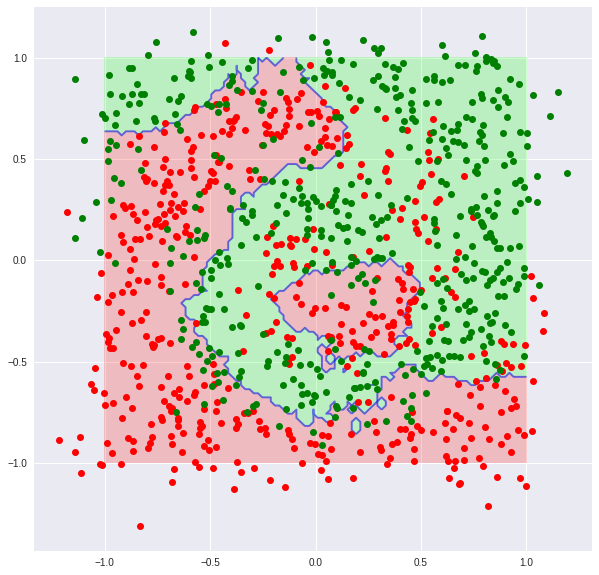

In [5]:
xs = np.linspace(-1, 1, 100)
ys = np.linspace(-1, 1, 100)
zs = np.zeros((100, 100))
k = 95

matrix = df.as_matrix()
for i,x in enumerate(xs):
    for j,y in enumerate(ys):
        zs[j, i] = predictk(df.as_matrix(), (x,y), k)

plt.figure(figsize=(10, 10))
plt.contour(xs, ys, zs, levels=(-1, 0, 1), linewidths=2, colors='blue', alpha=0.5)
plt.contourf(xs, ys, zs, levels=(-1, 0, 1), colors=('#ff0000', '#00ff00'), alpha=0.2)
plt.plot(df[df['label'] == 0]['x'], df[df['label'] == 0]['y'], 'ro')
plt.plot(df[df['label'] == 1]['x'], df[df['label'] == 1]['y'], 'go')

### Try Annoy

In [6]:
from annoy import AnnoyIndex

n_dim = 2

t = AnnoyIndex(n_dim)
for i in xrange(len(df)):
    t.add_item(i, [df.loc[i, 'x'], df.loc[i, 'y']])

t.build(10)
t.save('test.ann')

True

In [12]:
u = AnnoyIndex(n_dim)
u.load('test.ann')
print u.get_nns_by_item(1, 3)

[1, 349, 259]


In [10]:
%timeit u.get_nns_by_vector([0, 0], 3)

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.5 µs per loop


In [9]:
%timeit predictk(matrix, [0, 0], 3)

1000 loops, best of 3: 1.3 ms per loop
